http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/

In [9]:
# Purpose: classify tweet as having positive or negative sentiment  

In [8]:
import nltk
import pandas as pd
import numpy as np

### Step 1: Train Classifier using manually classified tweets 

In [2]:
# positive tweets

In [10]:
pos_tweets = [('I love this car', 'positive'),
              ('This view is amazing', 'positive'),
              ('I feel great this morning', 'positive'),
              ('I am so excited about the concert', 'positive'),
              ('He is my best friend', 'positive')]

In [11]:
neg_tweets = [('I do not like this car', 'negative'),
              ('This view is horrible', 'negative'),
              ('I feel tired this morning', 'negative'),
              ('I am not looking forward to the concert', 'negative'),
              ('He is my enemy', 'negative')]

### Step 2: Create single list of tuples containing two elements each; first element is array containing words and second element is type of sentiment
    #### Remove words smaller than two characters 
    #### Use lowercase for all text 

In [12]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

In [13]:
tweets

[(['love', 'this', 'car'], 'positive'),
 (['this', 'view', 'amazing'], 'positive'),
 (['feel', 'great', 'this', 'morning'], 'positive'),
 (['excited', 'about', 'the', 'concert'], 'positive'),
 (['best', 'friend'], 'positive'),
 (['not', 'like', 'this', 'car'], 'negative'),
 (['this', 'view', 'horrible'], 'negative'),
 (['feel', 'tired', 'this', 'morning'], 'negative'),
 (['not', 'looking', 'forward', 'the', 'concert'], 'negative'),
 (['enemy'], 'negative')]

In [ ]:
# Test set of twitter data 
# Used to assess accuracy of trained classifier 

In [14]:
test_tweets = [('I feel happy this morning', 'positive'),
               ('Larry is my friend', 'positive'),
               ('I do not like that man', 'negative'),
               ('My house is not great', 'negative'),
               ('Your song is annoying', 'negative')]

In [15]:
test_tweets

[('I feel happy this morning', 'positive'),
 ('Larry is my friend', 'positive'),
 ('I do not like that man', 'negative'),
 ('My house is not great', 'negative'),
 ('Your song is annoying', 'negative')]

In [16]:
tweets_test = []
for (words, sentiment) in test_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets_test.append((words_filtered, sentiment))

In [17]:
tweets_test

[(['feel', 'happy', 'this', 'morning'], 'positive'),
 (['larry', 'friend'], 'positive'),
 (['not', 'like', 'that', 'man'], 'negative'),
 (['house', 'not', 'great'], 'negative'),
 (['your', 'song', 'annoying'], 'negative')]

### Classifier 

### Step 3: Extract word features from tweets 
    #### features comprise of a list of every distinct word ordered by appearance frequency 

In [18]:
def get_words_in_tweets(tweets):
    """ appending contents of tweets tuple to a list """
    
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)  # The method extend() appends the contents of seq to list.
    return all_words

# test = get_words_in_tweets(tweets)


def get_word_features(wordlist):
    """ retrieve list of distinct words from tweets and corresponding frequency """
    
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features 

word_features = get_word_features(get_words_in_tweets(tweets))

In [19]:
word_features

dict_keys(['this', 'amazing', 'horrible', 'feel', 'looking', 'tired', 'car', 'view', 'forward', 'morning', 'love', 'friend', 'great', 'concert', 'about', 'like', 'excited', 'best', 'the', 'enemy', 'not'])

### Step 4: Decide which words are relevant for classifier 
    #### Use feature extractor: returns dictionary showing which words are contained in the input passed 

In [20]:
def extract_features(document):
    """ feature extractor creation """
    document_words = set(document) # set is an unordered collection of items; every element is unique (no duplicates)
    features = {}
    for word in word_features: #word_features list created in code above  
        features['contains(%s)' % word] = (word in document_words)
    return features

# test = extract_features(['love', 'this', 'car'])
# test

In [ ]:
# We can now pass feature extractor function (above) and our tweets through 

In [21]:
training_set = nltk.classify.apply_features(extract_features, tweets)

training_set

[({'contains(this)': True, 'contains(morning)': False, 'contains(amazing)': False, 'contains(looking)': False, 'contains(concert)': False, 'contains(best)': False, 'contains(car)': True, 'contains(great)': False, 'contains(forward)': False, 'contains(horrible)': False, 'contains(like)': False, 'contains(the)': False, 'contains(tired)': False, 'contains(not)': False, 'contains(enemy)': False, 'contains(excited)': False, 'contains(love)': True, 'contains(friend)': False, 'contains(feel)': False, 'contains(view)': False, 'contains(about)': False}, 'positive'), ({'contains(this)': True, 'contains(morning)': False, 'contains(amazing)': True, 'contains(looking)': False, 'contains(concert)': False, 'contains(best)': False, 'contains(car)': False, 'contains(great)': False, 'contains(forward)': False, 'contains(horrible)': False, 'contains(like)': False, 'contains(the)': False, 'contains(tired)': False, 'contains(not)': False, 'contains(enemy)': False, 'contains(excited)': False, 'contains(love

In [22]:
tweets

[(['love', 'this', 'car'], 'positive'),
 (['this', 'view', 'amazing'], 'positive'),
 (['feel', 'great', 'this', 'morning'], 'positive'),
 (['excited', 'about', 'the', 'concert'], 'positive'),
 (['best', 'friend'], 'positive'),
 (['not', 'like', 'this', 'car'], 'negative'),
 (['this', 'view', 'horrible'], 'negative'),
 (['feel', 'tired', 'this', 'morning'], 'negative'),
 (['not', 'looking', 'forward', 'the', 'concert'], 'negative'),
 (['enemy'], 'negative')]

### Step 5: train classifier

In [23]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

classifier

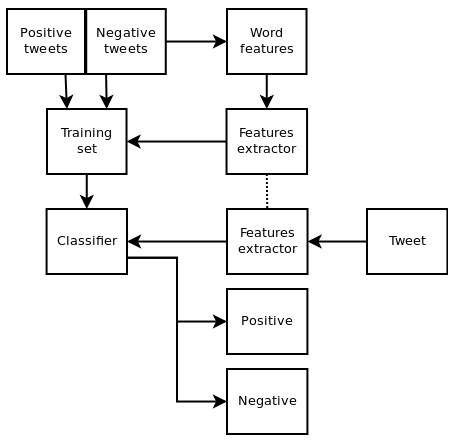

In [25]:
# Insert Image

from IPython.display import Image
Image(filename='C:/Users/IBM_ADMIN/Box Sync/Local Python Scripts Sync/Self Learning/Text Analytics/Naive Bayes Classifier Diagram.PNG')


# below is an image flow of what we did above 

In [ ]:
# Naive Bayes classifier uses prior probability of each label (freq of each label in training set) & contribution from each feature
    # i.e. the word 'amazing' appears in 1/5 positive tweets and none of negative tweets 
        # likelihood of 'positive' label will be multiplied by 0.2 when this word is seen as part of input 

In [27]:
# Exploratory: display most informative features for our classifier 
    # i.e. if input does not contain word 'not' then positive ration is 1.6 

print (classifier.show_most_informative_features(32))

Most Informative Features
           contains(not) = False          positi : negati =      1.6 : 1.0
       contains(looking) = False          positi : negati =      1.2 : 1.0
         contains(great) = False          negati : positi =      1.2 : 1.0
      contains(horrible) = False          positi : negati =      1.2 : 1.0
          contains(love) = False          negati : positi =      1.2 : 1.0
         contains(about) = False          negati : positi =      1.2 : 1.0
        contains(friend) = False          negati : positi =      1.2 : 1.0
       contains(amazing) = False          negati : positi =      1.2 : 1.0
          contains(best) = False          negati : positi =      1.2 : 1.0
         contains(enemy) = False          positi : negati =      1.2 : 1.0
         contains(tired) = False          positi : negati =      1.2 : 1.0
          contains(like) = False          positi : negati =      1.2 : 1.0
       contains(excited) = False          negati : positi =      1.2 : 1.0

In [28]:
# Test Classifier with random tweet Part I 

tweet = 'Larry is my friend'
print (classifier.classify(extract_features(tweet.split())))

positive


In [29]:
# Test Classifier with random tweet Part II 

tweet = 'My house is not great'
print (classifier.classify(extract_features(tweet.split())))

negative


In [30]:
tweet = test_tweets
print (classifier.classify(extract_features(tweet)))

positive
